## Chi Square Testing
Uji Chi-square yang umum dikenal oleh banyak orang adalah pengujian terhadap keterkaitan antara dua buah variabel hasil perhitungan (count data), sehingga dasar pengujian yang digunakan adalah selisih nilai proporsi dari nilai observasi dengan nilai harapan. 

In [23]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t as t_func
from scipy.stats import norm
from scipy.stats import kurtosis

%matplotlib inline

##### Import dataframe 

In [61]:
df = pd.read_csv('supermarket.csv')

In [79]:
df.groupby('Product line').count()

,Invoice ID,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,,,,,,,,,
Electronic accessories,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170
Fashion accessories,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178
Food and beverages,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174
Health and beauty,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
Home and lifestyle,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160
Sports and travel,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166


In [83]:
df_prd = df.groupby('Product line').count().reset_index()[['Product line','City']].sort_values('City',ascending=False)
df_prd['city_count']=df_prd['City'].cumsum()
df_prd['pcg_csum']=df_prd['city_count']/df_prd['city_count'].max()
df_prd = df_prd[df_prd['pcg_csum']<=0.95]
df_prd

,Product line,City,city_count,pcg_csum
1,Fashion accessories,178,178,0.178
2,Food and beverages,174,352,0.352
0,Electronic accessories,170,522,0.522
5,Sports and travel,166,688,0.688
4,Home and lifestyle,160,848,0.848


In [84]:
df_prd.describe()

,City,city_count,pcg_csum
count,5.0000,5.000000,5.000000
mean,169.6000,517.600000,0.517600
std,6.9857,265.033583,0.265034
min,160.0000,178.000000,0.178000
25%,166.0000,352.000000,0.352000
50%,170.0000,522.000000,0.522000
75%,174.0000,688.000000,0.688000
max,178.0000,848.000000,0.848000


In [86]:
print(df['Total'].describe())
df['Total'].describe()['mean']

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64


322.96674900000005

#### Chi Square Test

In [96]:
# Pivot Dataframe
df_chi = pd.read_csv('supermarket.csv')
df_pivot=df_chi.groupby(['City','Product line']).count()[['Branch','Total']].reset_index()
df_pivot = df_pivot.pivot(index="City",columns="Product line", values='Branch').fillna(0)
df_pivot

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,55,62,50,53,50,62
Naypyitaw,55,65,66,52,45,45
Yangon,60,51,58,47,65,59


In [97]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_pivot)
print(f'Observed chi2: {chisq:.2f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 11.56
p-value: 0.3156


#### Kesimpulan:
P-Value 0.3156 H0 diterima. Tidak ada hubungan antara City dengan pembelian product line.

## Two Sample Test

In [104]:
df_prod=df_chi.groupby('Product line').agg({'Total':['count','mean']}).reset_index()
df_prod.columns = df_prod.columns.droplevel()

In [105]:
df_prod.sort_values('count',ascending=False)

,,count,mean
1,Fashion accessories,178,305.089298
2,Food and beverages,174,322.671517
0,Electronic accessories,170,319.632538
5,Sports and travel,166,332.065220
4,Home and lifestyle,160,336.636956
3,Health and beauty,152,323.643020


In [107]:
df_fashion = df_chi[df_chi['Product line']=='Fashion accessories']
df_food = df_chi[df_chi['Product line']=='Food and beverages']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total', ylabel='Density'>

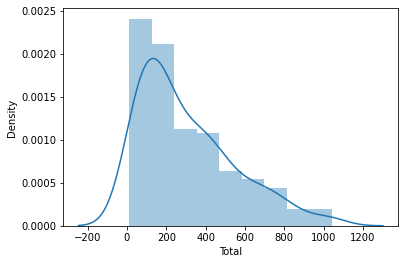

In [108]:
# Plot Fashion Accessories
sns.distplot(df_fashion['Total'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total', ylabel='Density'>

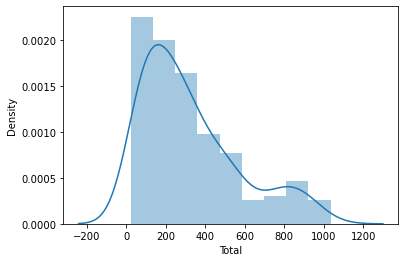

In [109]:
# Plot Food and Beverages
sns.distplot(df_food['Total'])

Fashion Accessories sample mean:305.089297752809
Fashion Accessories sample std:243.56412968898724
Fashion Accessories Kurtosis:0.3539314757981771
Food and Beverages sample mean:322.6715172413793
0.5019642093566969
t-statistic:0.6720997846039186
p-value:0.250982


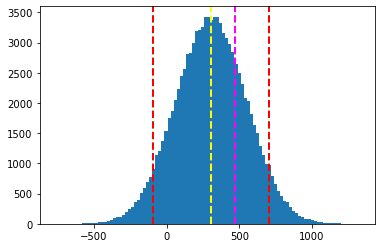

In [115]:
np.random.seed(123)
fashion_total =df_fashion['Total']
food_total = df_food['Total']
print("Fashion Accessories sample mean:" + str(fashion_total.mean()))
print("Fashion Accessories sample std:" + str(fashion_total.std()))
print("Fashion Accessories Kurtosis:" + str(fashion_total.kurtosis()))
print("Food and Beverages sample mean:" + str(food_total.mean()))

# Independent T-Test
t,p = stats.ttest_ind(food_total, fashion_total,equal_var=False)
print(p)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(fashion_total.mean(), fashion_total.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, fashion_total.mean(), fashion_total.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

#### Kesimpulan :
Nilai P-Value 0.25 > 0 artinya H0 diterima.